### A. Readme First
- Apabila kalian pengguna Ubuntu dari versi 14.04 hingga latest version, kalian bisa langsung menjalankan `Cell` &#8594; `Run All`.
- Apabila kalian bukan salah satu pengguna Ubuntu versi 14.04 hingga latest version, diharapkan untuk mengunduh dan mengekstrasi `Tugas Lab 1 - Images` dan melakukan ekstrasi hasilnya tepat di sebelah `MRS-Lab 1-A-2006609645-A-2006560876.ipynb` lalu menjalankan `Cell` &#8594; `Run All`.

### B. Persiapan Lingkungan Laboratorium
- Melakukan _install package_/_dependency_ yang diperlukan untuk `Tugas Laboratorium 1` kali ini.
- Melakukan _import library_ yang akan digunakan pada `Tugas Laboratorium 1` kali ini.
- Mengunduh dan mengekstrasi dokumen pendukung untuk tugas ini.

#### 1. Instalasi _Package_/_Dependency_
_Install dependency_ tidaklah wajib. Tetapi bisa jadi ada beberapa _dependency_ di bawah ini yang belum terinstall.

In [1]:
pip install numpy scikit-image matplotlib gdown

  Using cached https://files.pythonhosted.org/packages/b8/e5/a64ef44a85397ba3c377f6be9c02f3cb3e18023f8c89850dd319e7945521/numpy-1.19.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/0e/ba/53e1bfbdfd0f94514d71502e3acea494a8b4b57c457adbc333ef386485da/scikit_image-0.17.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/cd/d6/8c4dfb23151d5a494c66ebbfdb5c8c433b44ec07fae52da5939fcda0943f/matplotlib-3.3.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/2b/a8/f4c66eb529bb252d50e83dbf2909c6502e2f857550f22571ed8556f62d95/scipy-1.5.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/30/bf/92385b4262178ca22b34f82e0e09c2922eb351fe39f3cc7b8ba9ea555b41/Pillow-7.2.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/59/bb/d2b85265ec9fa3c1922210c9393d4cdf7075cc87cce6fe671d7455f80fbc/PyWavelets-1.1.1-cp36-cp36m-

#### 2. Melakukan _Import Library_ 

In [2]:
from skimage import color, exposure, filters, io, morphology, util
from skimage.transform import rescale
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

#### 3. Unduh dan Ekstrasi Dokumen Pendukung

In [3]:
os.system('gdown https://drive.google.com/uc?id=15XktpGOWYAEhrf8EmP584jlsES0KleME')
os.system('unzip Tugas\ Lab\ 1\ -\ Images.zip')

256

### C. Soal

1. [40] Diberikan citra `gedung.jpg` yang berukuran $603 \times 910$ \
![Gedung.jpg](Citra%20Lab%201/gedung.jpg)
    - [5] Tampilkan histogram citra tersebut dengan range intensitas $0-255$.
    - [10] Lakukan _histogram equalization_ terhadap citra tersebut kemudian tampilkan histogramnya.
    - [10] Lakukan _contrast streching_ terhadap citra asli kemudian tampilkan histogramnya.
    - [15] Coba ceritakan perbedaan apa yang dapat anda temukan antara metode _histogram equalization_ dan _contrast stretching_.

##### a. Menampilkan Histogram Citra 

In [4]:
basePath = 'Citra Lab 1/'
def getPath(fileName):
    return basePath + fileName

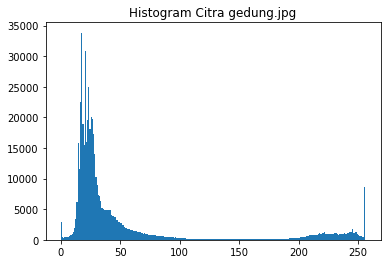

In [5]:
## Membaca citra gedung
citra_gedung = io.imread(getPath('gedung.jpg'))

## Mengubah citra gedung menjadi abu-abu
citra_gedung_gray = util.img_as_ubyte(color.rgb2gray(citra_gedung))

## Menampilkan histogram citra
plt.hist(citra_gedung_gray.flatten(), 256, range=(0,256))
plt.title('Histogram Citra gedung.jpg')

plt.show()

##### b. Melakukan Histogram Equalization 

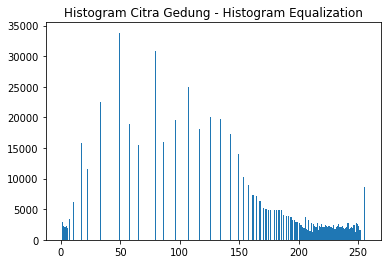

In [6]:
## Melakukan histogram equalization pada citra_gedung dan menyimpannya pada variabel eq_citra_gedung
eq_citra_gedung = util.img_as_ubyte(exposure.equalize_hist(citra_gedung_gray))

## Menampilkan histogram dari citra
plt.hist(eq_citra_gedung.flatten(), 256, range=(0,256))
plt.title('Histogram Citra Gedung - Histogram Equalization')

plt.show()

##### c. Melakukan _Contrast Stretching_

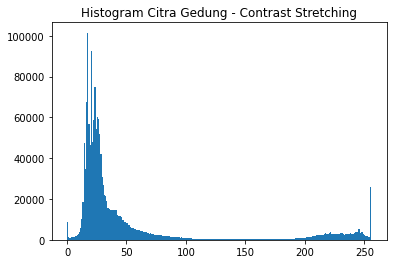

In [7]:
## Melakukan contrast stretching pada citra_gedung dan menyimpannya pada variabel eq_citra_gedung
mn = min(citra_gedung.flatten())
mx = max(citra_gedung.flatten())
b = int(np.floor(255 / (mx-mn)))
cs_citra_gedung = (citra_gedung - mn) * b

## Menampilkan histogram dari citra
plt.hist(cs_citra_gedung.flatten(), 256, range=(0,256))
plt.title('Histogram Citra Gedung - Contrast Stretching')

plt.show()

##### d. Perbedaan _Histogram Equalization_ dengan _Contrast Stretching_

1. Berdasarkan histogram, kita dapat melihat bahwa histogram contrast strecthing hanya memetakan satu nilai dari yang awalnya berada pada range $[\text{old_minimum}, \text{old_maximum}]$ menjadi $[\text{new_minimum}, \text{new_maximum}]$ menggunakan _linear normalization_. Singkatnya, _contrast streching_ memetakan satu-satu antara nilai _contrast_ pada citra sebelum dilakukan _contrast stretching_ dengan citra setelah dilakukan _contrast strecthing_. Sedangkan untuk _histogram equalization_ merupakan _non linear normalization_ yang menyebabkan histogram pada citra setelah dilakukan _histogram equalization_ tidak dapat di-restore ke citra sebelum dilakukannya _histogram equalization_.
2. Kemudian untuk _histogram equalization_, hasil histogram seperti "diratakan"/di-flatten dari histogram sebelumnya sehingga nilai tidak terlalu berkumpul pada satu nilai tertentu. Sedangkan _constrast streching_, hasil normalisasi tidak mengakibatkan nilai menjadi rata dan malah persebarannya tetap dikarenakan suatu nilai pada citra awal hanya dipetakan ke nilai baru pada citra baru dengan menggunakan hubungan `one-to-one`.

2. [30] Diberikan citra `bird.jpg` yang berukuran $484 \times 700$ \
![Gedung.jpg](Citra%20Lab%201/bird.jpg)
    - [10] Gunakan Sobel _spatial filter_ dan Prewitt _spatial filter_ untuk menentukan dan menampilkan _horizontal edge_ dari citra tersebut.
    - [10] Gunakan Sobel _spatial filter_ dan Prewitt _spatial filter_ untuk menentukan dan menampilkan _vertical edge_ dari citra tersebut.
    - [10] Berdasarkan dua hasil sebelumnya, temukan dan tampilkan _edge_ keseluruhan dari citra.

##### A. Sobel _spatial filter_ dan Prewitt _spatial filter_ untuk _Horizontal Edge_ 

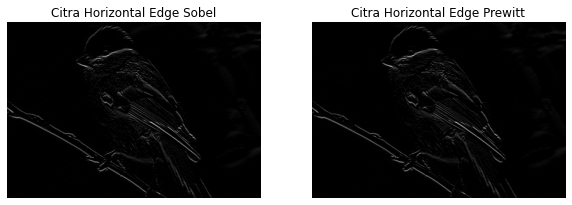

In [8]:
## Membaca citra burung
bird = io.imread(getPath('bird.jpg'))

## Mengubah citra burung menjadi abu-abu
bird_gray = color.rgb2gray(bird)

## Mendapatkan horizontal edge pada citra burung menggunakan Prewitt spatial filter
bird_gray_horizontal_edge_prewitt = util.img_as_ubyte(filters.prewitt_h(bird_gray))

## Mendapatkan horizontal edge pada citra burung menggunakan Sobel spatial filter
bird_gray_horizontal_edge_sobel = util.img_as_ubyte(filters.sobel_h(bird_gray))

plt.subplots(figsize=(10,10))
## Menampilkan Citra Horizontal Edge Sobel pada Citra Burung
plt.subplot(1,2,1)
plt.imshow(bird_gray_horizontal_edge_sobel, cmap='gray')
plt.title('Citra Horizontal Edge Sobel')
plt.axis('off')

## Menampilkan Citra Horizontal Edge Prewitt pada Citra Burung
plt.subplot(1,2,2)
plt.imshow(bird_gray_horizontal_edge_prewitt, cmap='gray')
plt.title('Citra Horizontal Edge Prewitt')
plt.axis('off')

plt.show()

##### B. Sobel _spatial filter_ dan Prewitt _spatial filter_ untuk _Vertical Edge_

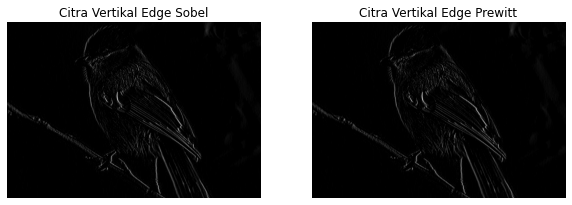

In [9]:
## Mendapatkan vertikal edge pada citra burung menggunakan Prewitt spatial filter
bird_gray_vertikal_edge_prewitt = util.img_as_ubyte(filters.prewitt_v(bird_gray))

## Mendapatkan vertikal edge pada citra burung menggunakan Sobel spatial filter
bird_gray_vertikal_edge_sobel = util.img_as_ubyte(filters.sobel_v(bird_gray))

plt.subplots(figsize=(10,10))
## Menampilkan Citra Vertikal Edge Sobel pada Citra Burung
plt.subplot(1,2,1)
plt.imshow(bird_gray_vertikal_edge_sobel, cmap='gray')
plt.title('Citra Vertikal Edge Sobel')
plt.axis('off')

## Menampilkan Citra Vertikal Edge Prewitt pada Citra Burung
plt.subplot(1,2,2)
plt.imshow(bird_gray_vertikal_edge_prewitt, cmap='gray')
plt.title('Citra Vertikal Edge Prewitt')
plt.axis('off')

plt.show()

##### C. Sobel _spatial filter_ dan Prewitt _spatial filter_ untuk Kedua Edge 

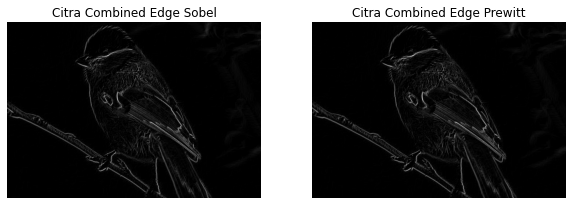

In [10]:
## Mendapatkan gabungan edge pada citra burung menggunakan Prewitt spatial filter
bird_gray_combined_edge_prewitt = np.bitwise_or(bird_gray_horizontal_edge_prewitt, bird_gray_vertikal_edge_prewitt)

## Mendapatkan gabungan edge pada citra burung menggunakan Sobel spatial filter
bird_gray_combined_edge_sobel = np.bitwise_or(bird_gray_horizontal_edge_sobel, bird_gray_vertikal_edge_sobel)

plt.subplots(figsize=(10,10))
## Menampilkan Citra Combined Edge Sobel pada Citra Burung
plt.subplot(1,2,1)
plt.imshow(bird_gray_combined_edge_sobel, cmap='gray')
plt.title('Citra Combined Edge Sobel')
plt.axis('off')

## Menampilkan Citra Combined Edge Prewitt pada Citra Burung
plt.subplot(1,2,2)
plt.imshow(bird_gray_combined_edge_prewitt, cmap='gray')
plt.title('Citra Combined Edge Prewitt')
plt.axis('off')

plt.show()

3. [30] Diberikan gambar `noisy_statue.jpg` sebagai berikut
![noisy_statue.jpg](Citra%20Lab%201/noisy_statue.jpg)
    - [7.5] Terapkan _median filter_ pada citra tersebut dengan ukuran kernel $9 \times 9$.
    - [7.5] Terapkan _mean filter_ pada citra tersebut dengan ukuran kernel $9 \times 9$.
    - [15] Ceritakan perbedaan citra yang dihasilkan pada dua hasil sebelumnya. Filter manakah yang hasilnya lebih baik menurut Anda? Berikan pula alasannya.

##### a. Menerapkan _median filter_ pada citra 

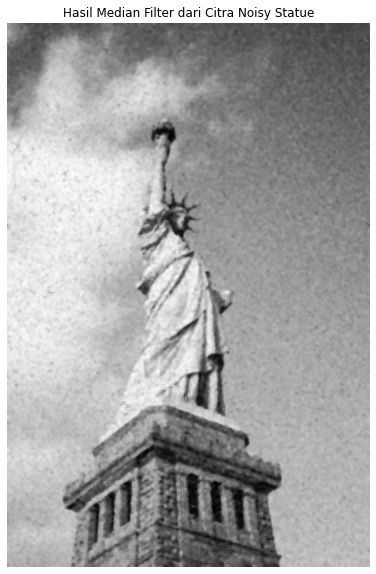

In [11]:
## Membaca citra noisy_statue
noisy_statue = io.imread(getPath('noisy_statue.jpg'))
gray_noisy_statue = util.img_as_ubyte(color.rgb2gray(noisy_statue))

## Menerapkan median filter
median_filter_citra = filters.rank.median(image=gray_noisy_statue,selem=morphology.square(9))

## Menampilkan citra setelah diterapkan median filter
plt.subplots(figsize=(20,10))
plt.imshow(median_filter_citra, cmap='gray')
plt.title('Hasil Median Filter dari Citra Noisy Statue')
plt.axis('off')

plt.show()

##### b. Menerapkan _median filter_ pada citra 

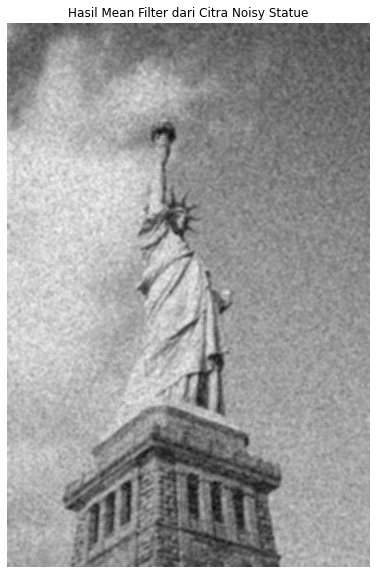

In [12]:
## Membaca citra noisy_statue
noisy_statue = io.imread(getPath('noisy_statue.jpg'))
gray_noisy_statue = util.img_as_ubyte(color.rgb2gray(noisy_statue))

## Menerapkan mean filter
mean_filter_citra = filters.rank.mean(image=gray_noisy_statue,selem=morphology.square(9))

plt.subplots(figsize=(20,10))
## Menampilkan citra setelah diterapkan median filter
plt.imshow(mean_filter_citra, cmap='gray')
plt.title('Hasil Mean Filter dari Citra Noisy Statue')
plt.axis('off')

plt.show()

##### c. Perbandingan hasil _mean filter_ dengan _median filter_

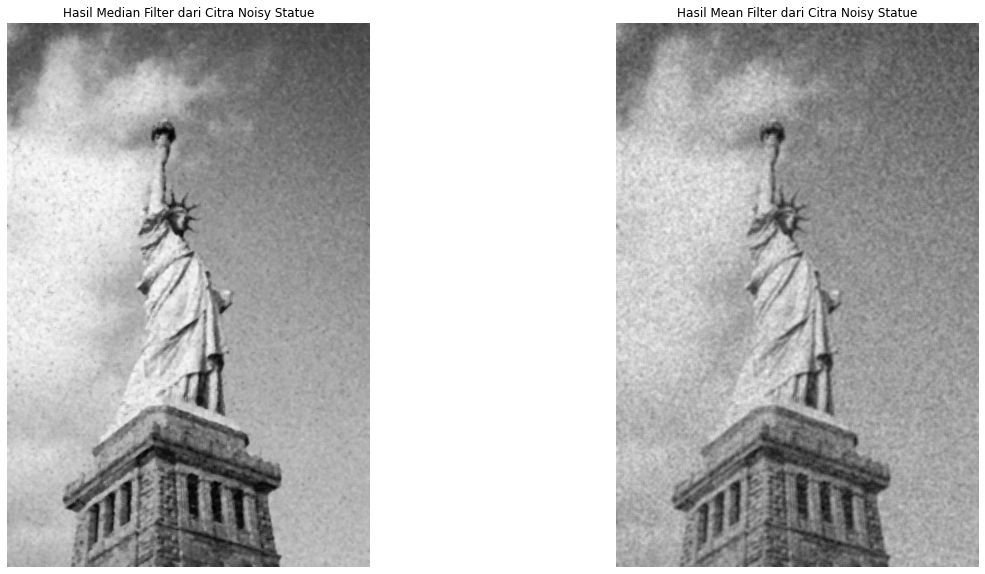

In [13]:
## Membandingkan dua citra dengan bantuan matplotlib.pyplot.subplot
plt.subplots(figsize=(20,10))

## Menyisipkan citra hasil median filter
plt.subplot(1,2,1)
plt.imshow(median_filter_citra, cmap='gray')
plt.title('Hasil Median Filter dari Citra Noisy Statue')
plt.axis('off')

## Menyisipkan citra hasil mean filter
plt.subplot(1,2,2)
plt.imshow(mean_filter_citra, cmap='gray')
plt.title('Hasil Mean Filter dari Citra Noisy Statue')
plt.axis('off')

plt.show()

Menurut kami, citra yang dihasilkan dari _median filter_ lebih baik dibandingkan citra yang dihasilkan dari _mean filter_. Hal ini ditunjukkan dengan meninjau banyaknya pixel yang memiliki warna/background yang kontras dengan sekelilingya sehingga menimbulkan semacam _noise_. Citra dari _median filter_ terlihat menampilkan _noise_ yang lebih sedikit dibandingkan citra dari _mean filter_.

Alasan tersebut didukung secara teori yang mana _median filter_ merupakan fungsi normalisasi yang `non-linear` yang memanfaatkan nilai yang ada pada tetangganya untuk dijadikan nilai pada piksel saat ini. _Median filter_ tidak menghasilkan nilai piksel yang tidak realistis/_exist_.